In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import torch
import torch.nn as nn

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


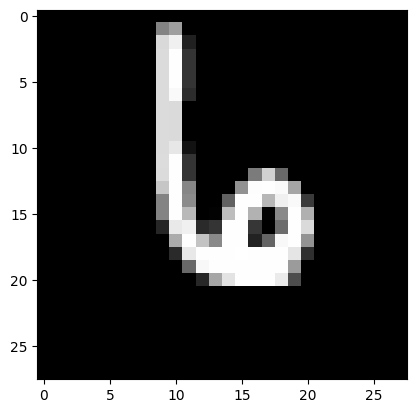

In [5]:
pixels = np.array(train.iloc[123])
pixels = pixels[1:]
pixels = pixels.reshape((28, 28))

plt.imshow(pixels, cmap='grey')

In [6]:
X_train = np.array(train.drop('label', axis=1)) / 255
y_train = np.array(train['label'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2026)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(33600, 784)
(33600,)
(8400, 784)


In [30]:
x0 = np.random.normal(size=(784, 10)) / np.sqrt(784)

In [31]:
neourons = torch.tensor(x0, requires_grad=True)

In [ ]:
X = torch.tensor(X_train)
y = torch.tensor(y_train)

optimizer = torch.optim.SGD(params=[neourons], lr = 1)
loss_history = []
epochs = 200

for i in range(epochs):
    predictions = X @ neourons
    loss = torch.nn.functional.cross_entropy(predictions, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())


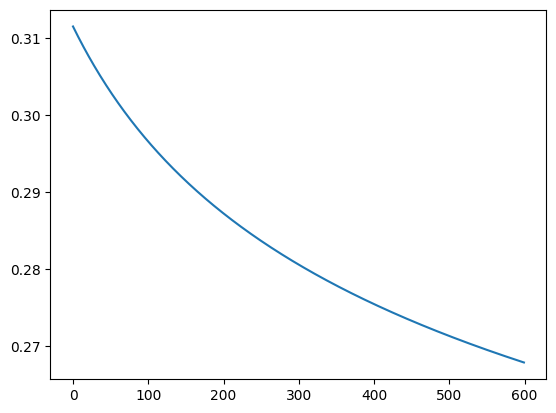

In [38]:
plt.plot(loss_history)

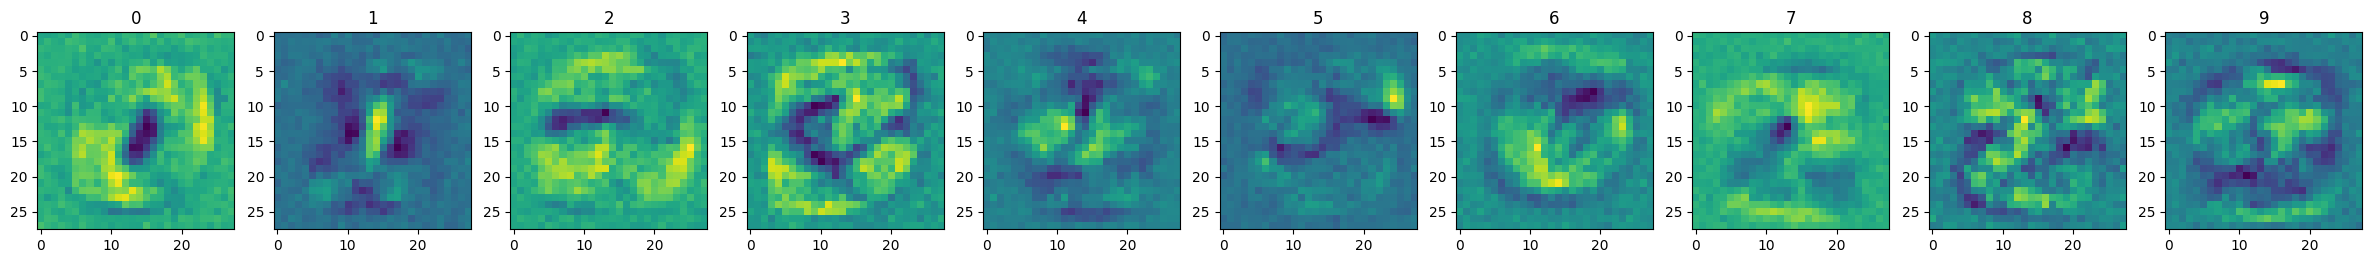

In [39]:
fig, axes = plt.subplots(1, 10, figsize=(30,30))

for i in range(10):
    axes[i].set_title(i)
    neuron_img = neourons[:,i].data.numpy().reshape(28, 28)
    axes[i].imshow(neuron_img)

In [40]:
def sigmoid(x):
    ex = np.exp(x)
    return ex / 1+ ex

digit_probabilities = sigmoid((X @ neourons).data.numpy())
print(digit_probabilities.shape)

(33600, 10)


In [41]:
from sklearn.metrics import f1_score

predictions = np.argmax(digit_probabilities, axis=1)
print(predictions.shape)
print("Train F1: ", f1_score(y_train, predictions, average='macro'))

(33600,)
Train F1:  0.9251725661142259
